
# Objetivo
Se aplicara el modelo de red neuronal(neural network) en el proyecto 1 donde se aplico los algoritmos de arboles de decision y vecinos cercanos para predecir el precio de las propiedades, a fin de mejorar la precision de la prediccion de precios.

# Metodologia
Se analizara y podara los datos con mas altos valores como se identifico en el sprint 1 despues se procedera a implementara el algoritmo de neural network de la libreria Keras.

Se compilara el argoritmo de red neuronal iterativamente para obtener una mejor precision en la prediccion del precio de las propiedades.

#Hipotesis
Mientras mas iteraciones tenga el modelo se vuelve mas preciso, esto se vera reflejado en la disminucion del Error Cuadratico Medio(MSE).

#Desarrollo
1. Se importara la librerias necesarias para la realizacion del proyecto asi como el dataset utilizado en el primer proyecto Properati.csv.
2. Se realizara el analisis de los datos y filtrado de datos como se hizo en el proyecto 1 de manera que solo queden los datos optimos para realizar la prediccion
3. Se implementara el algoritmo de red neuronal con los datos seleccionados.

#Desarrollo

## 1 importacion de librerias y dataset.

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
  
from google.colab import drive
drive.mount('/content/drive')

data_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS_Proyecto_01_Datos_Properati.csv')
data = pd.DataFrame(data_csv)
print(data.shape)


Mounted at /content/drive
(146660, 19)


In [ ]:
dataset = data.values


In [3]:
data.head()


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


#2. Analisis y filtrado de datos

El dataset cuenta con 19 columnas las cuales fueron analizadas al detalle en el proyecto 1, en donde se elimino los datos atipicos y se determino que las variables que mas influyen con el `precio` son `surface_total` y `surface_covered`.

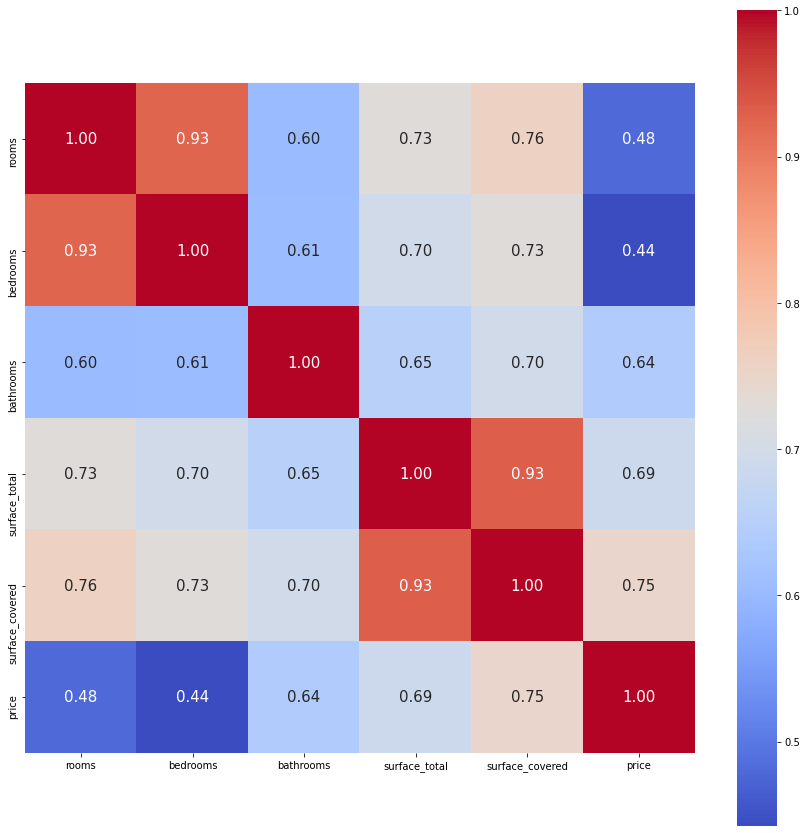

In [8]:
#Creamo la mascara
mask_ML_1 = np.logical_or(data.property_type == "Departamento",data.property_type == "Casa")
sub_mask_ML_1 = np.logical_or(data.property_type == "PH",mask_ML_1)
#Filtramos los datos por Departamento, Casa o PH
data_filter_ML_1 = data[sub_mask_ML_1]
#Filtramos solo los datos de Capital federal
data_filter_ML_1 = data_filter_ML_1[data_filter_ML_1.l2 == 'Capital Federal']

mask_ML_2 = np.logical_and(data_filter_ML_1.surface_total <=1000, data_filter_ML_1.surface_total >=15)
data_filter_ML_2 = data_filter_ML_1[mask_ML_2]
#Filtramos los datos de price menores a 4000000
data_filter_ML_2= data_filter_ML_2[data_filter_ML_2.price <=4000000]
#Eliminamos las columnas que no usaremos
data_filter_ML_2.drop(columns = {'start_date','end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3','currency','title','description', 'property_type', 'operation_type'}, inplace = True)
#Eliminamos los valores nulos
data_filter_ML_2 = data_filter_ML_2.dropna()

mask_surface_lowest_ML = data_filter_ML_2.surface_covered >data_filter_ML_2.surface_total

#surface_temp = data_filter_ML_2.copy()
data_filter_ML_2.loc[mask_surface_lowest_ML,'surface_covered']= data_filter_ML_2.loc[mask_surface_lowest_ML,'surface_total']

import seaborn as sns
corr = data_filter_ML_2.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr,cbar=True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')

# 3. Implementacion

El modelo escogido es neural network. para realizar  predicciones basandas en informacion existente.

La red neuronal consiste de diversas partes, entre las que se encuentran:
* **imput layers**: son las capas que toman inputs basadas en informacion previa existente
* **Hidden layers**: Son las capaz que usan retropropagacion para optimizar los pesos de las variables input, con el objetivo de mejorar el poder predictivo del modelo
* **Output layers**: Son las predicciones que se obtienen basandas en informacion del input y hiden layers.

La cantidad de epochs es la cantidad de veces que se entreno el modelo en el sentido adelante- atras, en el que se crea un ciclo a traves de todo el set de entrenamiento. Con el objetivo de que las perdidas decrezcan y el nivel del modelo mejore por cada pasada. De esta manera el modelo va a predecir el valor de Y de forma mas acertada por cada pasada. En este modelo particular, la cantidad de pasadas que se realizan son 20. Como se observa a medida que corren los epochs, el error disminuye hasta llegar al epoch 19, que comienza a subir nuevamente. 

La funcion matematica que se utiliza para procesar la informacion en el hidden layer es el metodo de activacion RELU (REctified Linear Unit), que determina si la informacion obtenida en el imput layer va a pasar a la proxima etapa llamada output layer.


In [16]:
X = data_filter_ML_2[["surface_covered", "surface_total"]]
Y = data_filter_ML_2["price"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.33, random_state=42)
model = Sequential()
model.add(Dense(512, input_dim = train_x.shape[1], kernel_initializer = "normal", activation="relu"))
model.add(Dense(512, kernel_initializer = "normal", activation="relu"))
model.add(Dense(1, kernel_initializer = "normal", activation = "linear"))

model.compile(loss="mean_absolute_error", optimizer="adam", metrics="mean_absolute_error")
history = model.fit(train_x, train_y, epochs=20, validation_split = 0.1)


Epoch 1/20
1527/1527 [==============================] - 7s 4ms/step - loss: 101450.5156 - mean_absolute_error: 101450.5156 - val_loss: 88634.2031 - val_mean_absolute_error: 88634.2031
Epoch 2/20
1527/1527 [==============================] - 6s 4ms/step - loss: 86543.6953 - mean_absolute_error: 86543.6953 - val_loss: 87655.6719 - val_mean_absolute_error: 87655.6719
Epoch 3/20
1527/1527 [==============================] - 6s 4ms/step - loss: 86000.1094 - mean_absolute_error: 86000.1094 - val_loss: 87692.1016 - val_mean_absolute_error: 87692.1016
Epoch 4/20
1527/1527 [==============================] - 6s 4ms/step - loss: 85825.0859 - mean_absolute_error: 85825.0859 - val_loss: 87379.1016 - val_mean_absolute_error: 87379.1016
Epoch 5/20
1527/1527 [==============================] - 6s 4ms/step - loss: 85802.6562 - mean_absolute_error: 85802.6562 - val_loss: 87529.3906 - val_mean_absolute_error: 87529.3906
Epoch 6/20
1527/1527 [==============================] - 11s 7ms/step - loss: 85780.4688 

Lo que se obtiene a medida que se realizan las 20 iteraciones (epochs), es la perdida (loss) arrojada por el set de entrenamiento y la perdida (val_loss) aplicada por el set de prueba. A media que se realizan iteraciones esta perdida disminuye, asi como tambien lo hace el MAE.


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


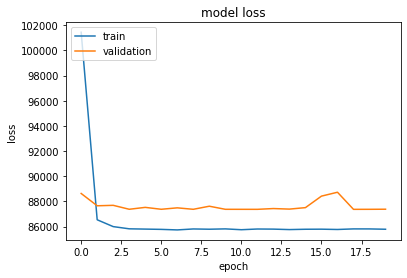

In [20]:
print(history.history.keys())
# "Loss"
#print(history.history['loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


El proceso para crear el modelo neural network, es en primer lugar, instalar las librerias necesarias. 
Dentro de las librerias que utilizamos
* Keras, que es una libreria de codigo abierta que se utiliza para redes neuronales, que funciona como interfaz de la libreria tensorflow. 
* Tensorflow por su parte es la mayor plataforma de aprendizaje automatico y la elegida para este modelo.

El resto de los recursos son los mismos que en las entregas anteriores, es decir sklearn, numpy, python, matplotlib, etc.

Luego, se realiza un test train split de los datos, se crean las capas de input, hidden y output, y se realiza el fit del modelo. 

El modelo de red neuronal, lo que va a hacer es intentar minimizar el valor de perdida o "loss", que representa la diferencia entre lo que el modelo predce y la realidad.  Esto se realiza mediante las iteraciones. En este caso, por ser de regresion el valor que va a intentar disminuir es el valor de MAE. 
Como se puede ver en el grafico, la diferencia o la perdida va disminuyendo por lo que el modelo va realizando predicciones mas acertadas a lo que realmente sucede.

Si bien la cantidad de epochs se detiene en 20 por el poder de procesador de la maquina, esta podria continuar para obtener un menor error absoluto medio (MAE), y un modelo mas preciso.

> Repositorio github de proyectos: https://github.com/jcdt/proyecto3ds
